In [1]:
%pylab inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## E1z2

In [35]:
metadata = pd.read_csv('data/mousedata_2020/E1z2/metadata.csv',index_col=0)
metadata

,orig.ident,nCount_RNA,nFeature_RNA,uniqueID,embryo,pos,z,x_global,y_global,x_global_affine,y_global_affine,embryo_pos,embryo_pos_z,Area,UMAP1,UMAP2,celltype_mapped_refined
embryo1_Pos0_cell100_z2,embryo1,107,80,embryo1_Pos0_cell100_z2,embryo1,Pos0,2,1625.055128,1346.268007,0.961726,-2.943951,embryo1_Pos0,embryo1_Pos0_2,8144,-6.462337,-1.034258,Erythroid
embryo1_Pos0_cell101_z2,embryo1,106,70,embryo1_Pos0_cell101_z2,embryo1,Pos0,2,1624.997889,1344.508417,0.959880,-3.000712,embryo1_Pos0,embryo1_Pos0_2,8560,-6.810907,-0.845417,Erythroid
embryo1_Pos0_cell102_z2,embryo1,886,210,embryo1_Pos0_cell102_z2,embryo1,Pos0,2,1625.716288,1335.714958,0.983054,-3.284372,embryo1_Pos0,embryo1_Pos0_2,15936,4.067604,0.122410,Gut tube
embryo1_Pos0_cell105_z2,embryo1,99,68,embryo1_Pos0_cell105_z2,embryo1,Pos0,2,1625.282523,1349.823455,0.969061,-2.829259,embryo1_Pos0,embryo1_Pos0_2,6768,-6.670613,-0.926943,Erythroid
embryo1_Pos0_cell106_z2,embryo1,267,147,embryo1_Pos0_cell106_z2,embryo1,Pos0,2,1625.242317,1352.717525,0.967764,-2.735902,embryo1_Pos0,embryo1_Pos0_2,7776,-3.569233,-3.798838,Haematoendothelial progenitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embryo1_Pos28_cell94_z2,embryo1,249,117,embryo1_Pos28_cell94_z2,embryo1,Pos28,2,1547.532898,1518.029214,-1.538991,2.596733,embryo1_Pos28,embryo1_Pos28_2,8160,1.387528,3.173942,Spinal cord
embryo1_Pos28_cell95_z2,embryo1,385,152,embryo1_Pos28_cell95_z2,embryo1,Pos28,2,1547.675803,1528.829589,-1.534381,2.945132,embryo1_Pos28,embryo1_Pos28_2,10032,-1.776725,-1.773125,Anterior somitic tissues
embryo1_Pos28_cell96_z2,embryo1,264,133,embryo1_Pos28_cell96_z2,embryo1,Pos28,2,1547.365765,1535.121229,-1.544382,3.148089,embryo1_Pos28,embryo1_Pos28_2,8368,0.336822,-0.025109,Neural crest
embryo1_Pos28_cell97_z2,embryo1,355,152,embryo1_Pos28_cell97_z2,embryo1,Pos28,2,1547.535748,1520.121983,-1.538899,2.664242,embryo1_Pos28,embryo1_Pos28_2,7552,1.500579,4.424931,Spinal cord


In [36]:
expdata = pd.read_csv('data/mousedata_2020/E1z2/counts.csv',index_col=0)
expdata = expdata.T

In [37]:
min_x = metadata.x_global.min()
min_y = metadata.y_global.min()
max_x = metadata.x_global.max()
max_y = metadata.y_global.max()
dis_x = max_x - min_x
dis_y = max_y - min_y

In [38]:
xv, yv = np.meshgrid(np.linspace(min_x, max_x, 30),np.linspace(min_y, max_y, 40))

In [39]:
xbin = np.diff(xv[0])[0]
ybin = np.diff(yv[:,0])[0]
xbin,ybin

(5.419293802859556, 5.550054857803843)

In [ ]:
250/(6*5.4)*5.4

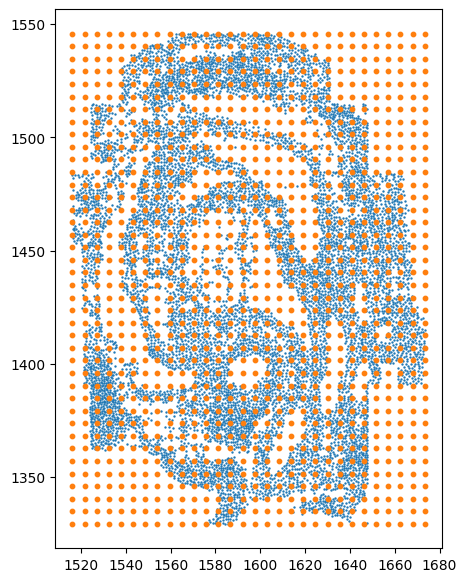

In [40]:
figsize(5,7)
scatter(metadata.x_global,metadata.y_global,s=0.5)
scatter(xv.flatten(),yv.flatten(),s=10)

In [9]:
indicator = np.zeros_like(xv)

In [10]:
xy_coord = metadata[['x_global','y_global']].values

In [25]:
annotationdf =  pd.get_dummies(metadata.celltype_mapped_refined)

In [63]:
from tqdm import tqdm
indicator = np.zeros(xv.shape[0]*xv.shape[1])
st_counts = np.zeros([xv.shape[0]*xv.shape[1],expdata.shape[1]])
st_anno = np.zeros([xv.shape[0]*xv.shape[1],annotationdf.shape[1]])
isslected=[]
for i in tqdm(range(xv.shape[0])):
    for j in range(xv.shape[1]):
        xbmin = xv[i][j]-xbin/100*55/2
        xbmax = xv[i][j]+xbin/100*55/2
        ybmin = yv[i][j]-ybin/100*55/2
        ybmax = yv[i][j]+ybin/100*55/2
        tmp=[]
        for x in range(xy_coord.shape[0]):
            if xy_coord[x][0]>xbmin and xy_coord[x][0]<=xbmax and xy_coord[x][1]>ybmin and xy_coord[x][1]<=ybmax:
                st_counts[i*xv.shape[1]+j]+=expdata.values[x]
                indicator[i*xv.shape[1]+j]+=1
                st_anno[i*xv.shape[1]+j]+=annotationdf.values[x]
                tmp.append(x)
        isslected.append(tmp)

100%|██████████| 40/40 [00:04<00:00,  9.08it/s]


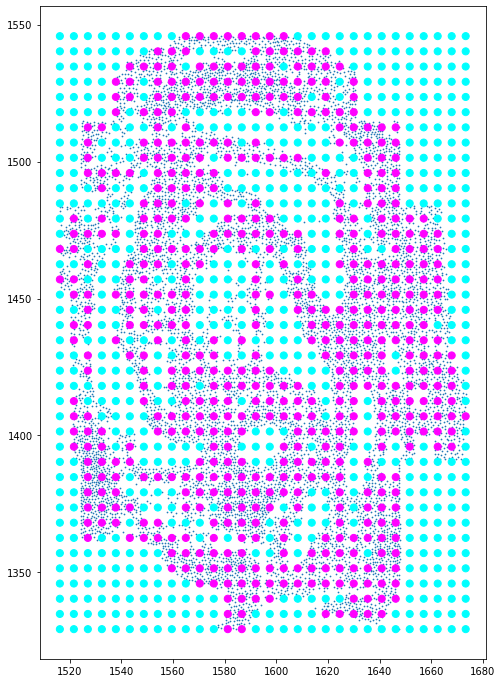

In [30]:
figsize(8,12)
scatter(metadata.x_global,metadata.y_global,s=0.5)
scatter(xv.flatten(),yv.flatten(),c=(indicator>=3),s=50,cmap='cool')

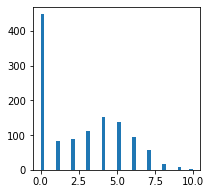

In [31]:
figsize(3,3)
hist(indicator,bins=40);

In [49]:
stdata_df = pd.DataFrame(st_counts,columns=expdata.columns,index=['ST_'+str(i) for i in range(st_counts.shape[0])])

stmetadata = pd.DataFrame([xv.flatten(),yv.flatten()],columns=stdata_df.index,index=['coord_x','coord_y'])
stmetadata = stmetadata.T

stannodf = pd.DataFrame(st_anno,columns=annotationdf.columns)
stannodf.index = stmetadata.index

In [50]:
stdata_df = stdata_df[indicator>=3]
stmetadata = stmetadata[indicator>=3]
stannodf = stannodf[indicator>=3]
stannodf = stannodf.div(stannodf.sum(1),0)

In [68]:
isslectednp = np.array(isslected)[indicator>=3]

<ipython-input-68-1cf47c264156>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  isslectednp = np.array(isslected)[indicator>=3]


In [73]:
idxslected =[]
for x in isslectednp.tolist():
    idxslected = idxslected+x
idxslected = sorted(list(set(idxslected)))

In [75]:
metadatac = np.zeros(metadata.shape[0])

In [77]:
metadatac[idxslected]=1

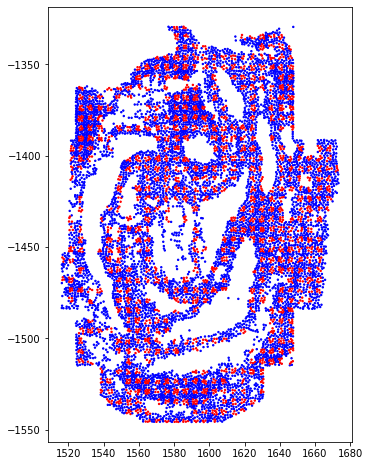

In [84]:
figsize(12,8)
subplot(121)
plt.scatter(metadata.x_global,-metadata.y_global,c=metadatac,s=2,cmap='bwr')

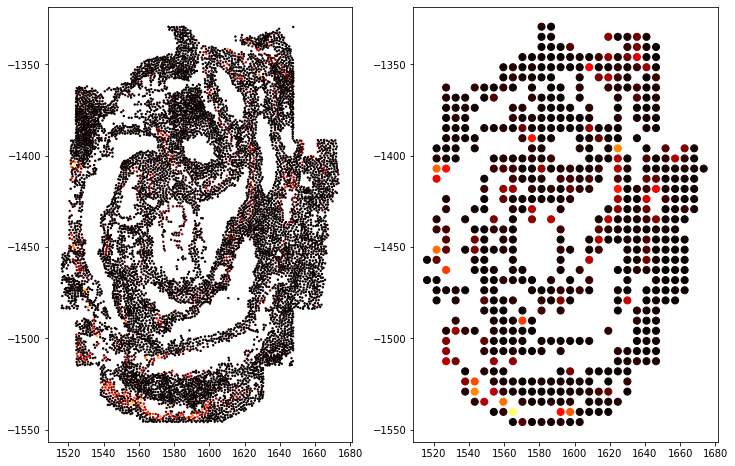

In [51]:
figsize(12,8)
subplot(121)
plt.scatter(metadata.x_global,-metadata.y_global,c=expdata.Cd34,s=2,cmap='hot')
subplot(122)
plt.scatter(stmetadata.coord_x,-stmetadata.coord_y,c=stdata_df.Cd34,s=50,cmap='hot')

In [21]:
stmetadata.to_csv('data/mousedata_2020/E1z2/simu_st_metadata.csv')
stdata_df.T.to_csv('data/mousedata_2020/E1z2/simu_st_counts.csv')

In [53]:
stannodf.to_csv('data/mousedata_2020/E1z2/simu_st_celltype.csv')